In [ ]:
#Import the necessary libraries and modules
import numpy as np
import pandas as pd
from matplotlib import colors
from tqdm import tqdm as tqdm
%matplotlib inline
import plotly as pl
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture

In [ ]:
from sklearn.preprocessing import StandardScaler,normalize

In [ ]:
#Drop the invalid data
data = pd.read_csv('/content/cell2celltrain.csv')
data.dropna()
print(data)


       CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCall

In [ ]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [ ]:
#Label encode intergrs to binary
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]
from sklearn import preprocessing
k=preprocessing.LabelEncoder()
k.fit(data['Churn'])
data['Churn']=k.transform(data['Churn'])
data.dropna(inplace=True)
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]
k=preprocessing.LabelEncoder()
k.fit(data['BuysViaMailOrder'])
data['BuysViaMailOrder']=k.transform(data['BuysViaMailOrder'])
data.dropna(inplace=True)
data=data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Standardize the data
scaler=StandardScaler()
df_scl=scaler.fit_transform(data)

In [ ]:
categerical_col = data.select_dtypes(include=['object']).columns
numberical_col = data._get_numeric_data().columns
data[numberical_col] = data[numberical_col].astype(float)

In [ ]:
def missing_percentage(data):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_percentage(data)

,Total,Percent
Churn,0,0.0
MonthlyRevenue,0,0.0
TotalRecurringCharge,0,0.0
DirectorAssistedCalls,0,0.0
OverageMinutes,0,0.0
RoamingCalls,0,0.0
DroppedCalls,0,0.0
ThreewayCalls,0,0.0
ReceivedCalls,0,0.0
OutboundCalls,0,0.0


In [ ]:
data[categerical_col] = data[categerical_col].fillna("No infor")
data[numberical_col] = data[numberical_col].fillna(0)

In [ ]:
std = np.std(data[numberical_col])
mean = np.mean(data[numberical_col])

In [ ]:
#Remove the outlier data
def cnt_outlier(data,sd, inc_cols=[]):
    num_cols = data.select_dtypes(include=[np.number]).columns
    num_cols = [e for e in num_cols if e in inc_cols]
    outlier = (data[numberical_col]-mean).abs() > sd*std
    return outlier.sum()

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(data[numberical_col]))
threshold = 4
data_work = data[(z <= 4).all(axis=1)]
data_work.head()

,Churn,MonthlyRevenue,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,DroppedCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,BuysViaMailOrder
4,1.0,17.14,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1.0
5,0.0,38.05,52.0,0.25,0.0,0.0,9.0,0.0,42.2,6.7,0.0,53.0,0.0
6,0.0,31.66,30.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,1.0
8,0.0,35.30,35.0,0.00,0.0,0.0,0.0,0.0,2.4,4.0,1.7,53.0,0.0
9,0.0,81.00,75.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0


In [ ]:
#Bartlett' test of sphericity is used to test the null hypothesis that the variables in the population correlation matrix are uncorrelated.
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_work[numberical_col])
chi_square_value, p_value


(236777.22929353613, 0.0)

In [ ]:
#KMO measure of sampling adequacy is a test to assess the appropriateness of using factor analysis on the data set.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.659786564363075

In [ ]:
#Eigenvalues are the special set of scalar values that is associated with the set of linear equations most probably in the matrix equations.
fa = FactorAnalyzer()
fa.fit(data)
eigen_values, vectors = fa.get_eigenvalues()
x = np.arange(1,data.shape[1]+1)
import plotly.graph_objects as go
import numpy as np

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 522 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=71d15ea1ee941db64851fe6c5d4e7d53bca91627288fc0f226aec097d14c6620
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
fig = go.Figure(data=go.Scatter(x=x, y=eigen_values))
fig.update_layout(title='Eigen value by number of factors',
                   xaxis_title='Factors',
                   yaxis_title='eigen_values')
fig.show()

In [ ]:
_, _, cumvar = fa.get_factor_variance()
fig = go.Figure(data=go.Scatter(x=x, y=cumvar))
fig.update_layout(title='Eigen value by number of factors',
                   xaxis_title='Numbe of Factors',
                   yaxis_title='Variance%')
fig.show()

In [ ]:
fa.set_params(n_factors=4, rotation='varimax')
fa.fit(data)
loadings = fa.loadings_
factor_loading = pd.DataFrame(loadings)
factor_loading.head()

,0,1,2,3
0,-0.022477,-0.001516,-0.076378,0.014615
1,0.309280,0.898563,0.170900,0.252003
2,0.194311,0.483991,0.679518,0.045237
3,0.209754,0.333311,0.164056,0.046896
4,0.369416,0.837061,-0.395770,-0.053347


In [ ]:
fa.get_factor_variance()
factor_variance = pd.DataFrame(fa.get_factor_variance())
factor_variance

,0,1,2,3
0,2.399023,2.187312,0.842918,0.732144
1,0.184540,0.168255,0.064840,0.056319
2,0.184540,0.352795,0.417635,0.473954


In [ ]:
fa_finnal = FactorAnalyzer(n_factors=4, rotation="varimax")
fa_finnal.fit(data)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [ ]:
col_name = []
for i in range(4): 
    col_name.append('Factor '+str(i+1))
df_factors = fa_finnal.transform(data)
df_factors = pd.DataFrame(df_factors, columns = col_name)

In [ ]:
#Here we have to predict the best amount of clusters for our dataset using the BIC score 
def gmm_bic(a, lower=2, upper=10):
    bic = []
    for i in tqdm(range(lower,upper)):
        gm = GaussianMixture(n_components=i, covariance_type="full",max_iter=300, random_state=42)
        gm.fit(data)
        b = gm.bic(data)
        bic.append(b)
        print('Convergence? {} at iteration {}'.format(gm.converged_, gm.n_iter_))
    fig = go.Figure(data=go.Scatter(x=np.arange(lower,upper), y=bic))
    fig.update_layout(title='BIC',
                   xaxis_title='Numbe of Clusters',
                   yaxis_title='BIC')
    fig.show()

In [ ]:
gmm_bic(df_factors)

 12%|█▎        | 1/8 [00:02<00:19,  2.78s/it]

Convergence? True at iteration 20


 25%|██▌       | 2/8 [00:08<00:27,  4.58s/it]

Convergence? True at iteration 49


 38%|███▊      | 3/8 [00:11<00:19,  3.95s/it]

Convergence? True at iteration 30


 50%|█████     | 4/8 [00:16<00:16,  4.16s/it]

Convergence? True at iteration 35


 62%|██████▎   | 5/8 [00:25<00:18,  6.14s/it]

Convergence? True at iteration 60


 75%|███████▌  | 6/8 [00:45<00:21, 10.69s/it]

Convergence? True at iteration 106


 88%|████████▊ | 7/8 [01:04<00:13, 13.42s/it]

Convergence? True at iteration 71


100%|██████████| 8/8 [01:17<00:00,  9.65s/it]

Convergence? True at iteration 55


In [ ]:
gmm = GaussianMixture(n_components=4, max_iter=300, random_state=42)
gmm.fit(df_factors)
data['what'] = gmm.predict(df_factors)

In [ ]:
print(data['what'])

0        0
1        0
2        0
3        1
4        0
        ..
51037    2
51039    0
51040    2
51041    1
51043    2
Name: what, Length: 50891, dtype: int64


In [ ]:
#Over here we segment the data using the gmm algorithm, using the amount of clusters chosen
pd.options.display.float_format = '{:,.2f}'.format
output = data[['Churn','MonthlyRevenue','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes','RoamingCalls','DroppedCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','MonthsInService','BuysViaMailOrder']].groupby(data['what']).mean().T
output.to_csv('result.csv')
#show gradient
def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]
# display output with gradient
output.style.apply(background_gradient,
#                highlight_max(output),
               cmap='RdBu',
               m=output.min().min(),
               M=output.max().max(),
               low=0,
               high=0.2).format('{:,.2f}')

what,0,1,2,3
Churn,0.28,0.29,0.29,0.33
MonthlyRevenue,37.82,140.40,57.37,78.90
TotalRecurringCharge,41.00,70.28,46.76,45.68
DirectorAssistedCalls,0.38,2.75,0.93,1.00
OverageMinutes,0.35,199.64,40.55,19.55
RoamingCalls,0.30,2.80,0.39,18.47
DroppedCalls,2.46,15.86,7.15,5.60
ThreewayCalls,0.12,0.85,0.35,0.19
ReceivedCalls,33.28,359.17,138.60,75.63
OutboundCalls,8.26,76.19,30.52,16.76


In [ ]:
r=data.groupby('what').size()
print(r)

what
0    22315
1     5700
2    21138
3     1738
dtype: int64


In [ ]:
print("low revenue",r[0])
print("high revenue",r[1])
print("Average",r[2])
print("High roaming calls",r[3])

low revenue 22315
high revenue 5700
Average 21138
High roaming calls 1738


In [ ]:
norm=normalize(df_scl)

In [ ]:
df_norm=pd.DataFrame(norm)

In [ ]:
from sklearn import metrics

In [ ]:
#
models = [GaussianMixture(n,covariance_type='tied', random_state=123).fit(df_norm) for n in range(2,15)]
plt.plot(range(2,15), [m.bic(df_norm) for m in models], label='BIC')
plt.plot(range(2,15), [m.aic(df_norm) for m in models], label='AIC')
plt.legend()
plt.xlabel('n_components')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
#over here we test our data using different parameters and clusters
parameters=['full','tied','diag','spherical']
n_clusters=np.arange(1,21)
results_=pd.DataFrame(columns=['Covariance Type','Number of Cluster','Silhouette Score','Davies Bouldin Score'])
for i in parameters:
    for j in n_clusters:
        gmm_cluster=GaussianMixture(n_components=j,covariance_type=i,random_state=123)
        clusters=gmm_cluster.fit_predict(df_norm)
        if len(np.unique(clusters))>=5:
          results_=results_.append({"Covariance Type":i,'Number of Cluster':j,"Silhouette Score":metrics.silhouette_score(df_norm,clusters),
                                    'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}
                                   ,ignore_index=True)

KeyboardInterrupt: ignored

In [ ]:
#Over here the results arranged from best to worst
display(results_.sort_values(by=["Silhouette Score"], ascending=False)[:10])

,Covariance Type,Number of Cluster,Silhouette Score,Davies Bouldin Score
1,full,6,0.11,3.27
0,full,5,0.09,3.86


In [ ]:
#Over here it is clusted based on a certain covaraince_type and amount of components
gmm_cluster=GaussianMixture(n_components=7,covariance_type="spherical",random_state=123)
gmm_cluster.fit(df_norm)
gmm_labels = gmm_cluster.predict(df_norm)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Here we import pca
pca=PCA()
pca = PCA(n_components=3).fit_transform(df_norm)

NameError: ignored

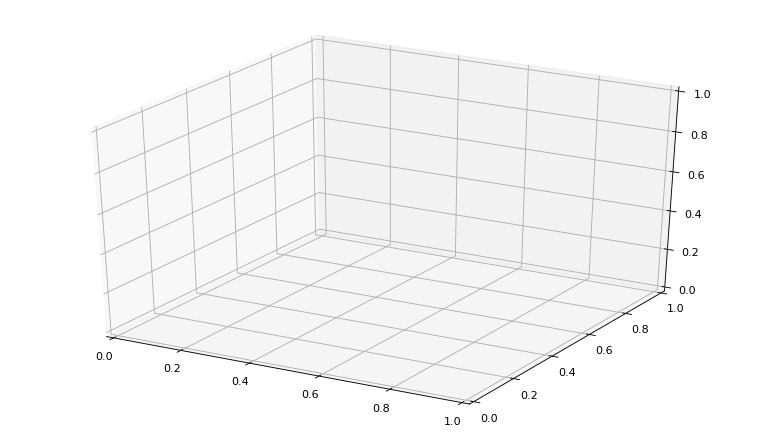

In [ ]:
#Then we plot it on a 3D graph the semgnted data
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=gmm_labels,cmap='Spectral')
xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [ ]:
pca = PCA(n_components = 7)
pca.fit(df_norm)
scores_pca = pca.transform(df_norm)


In [ ]:
data_segm_gmm = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
data_segm_pca_gmm = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
data_segm_pca_gmm.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3','Comp 4','Comp 5','Comp 6','Comp 7']
data_segm_pca_gmm['Segment K-means PCA'] = gmm_labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



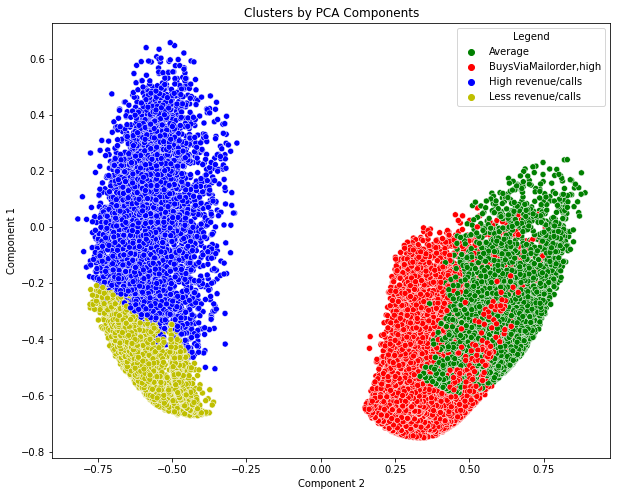

In [ ]:
#Here we plot on a 2D graph
data_segm_pca_gmm['Legend'] = data_segm_pca_gmm['Segment K-means PCA'].map({0:'Less revenue/calls', 
           1:'Average',
           2:'High revenue/calls', 
           3:'BuysViaMailorder,high'})
x_axis = data_segm_pca_gmm['Component 2']
y_axis = data_segm_pca_gmm['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = data_segm_pca_gmm['Legend'], palette = ['g','r','b','y'])
plt.title('Clusters by PCA Components')
plt.show()

1. Import libraries
2. Import the dataset and readit
3. Check the data
4. Clean the data
5. Average it out
6. Check the outlier data ( data which is far outside the average), and remove it
7. Then we need to check the factorability, which is can we find factors in the dataset? (this is1. Import libraries simmilar to correlation)
8. We perfrom a Bartlett test to see the p value and if 0 the data is statistically significant, indicating that the observed correlation matrix is not an identity matrix
9. Then we do a KMO test to see the qualitive range of data we have
10. Then we choose the amount of factos using eign values using a graph
11. We also see the varience of factors
12. Then we use a factor loading graph The factor loading is a matrix that shows the relationship of each variable to the underlying factor..
13. Then we see the varience of each factor
14. Then we create a data frame with the facors we found earlier (eg:10)
15. Then we use the GMM model but first we need to choose the amount of clusters using our data framefactors and "bic"
16. Then we output the result after clustering
17. Finally we label each cluster based off their standout feature 

(TIP: To recheck the amount of clusters needed you can check your previous algorithms)